In [375]:
from __future__ import print_function

In [376]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

#visualization
%matplotlib inline
import seaborn as sns

In [377]:
testdata = pd.read_csv("/Users/christianjacobrenfro/Desktop/Kaggle/Titanic/test.csv")

In [378]:
traindata = pd.read_csv("/Users/christianjacobrenfro/Desktop/Kaggle/Titanic/train.csv")

In [379]:
train = pd.DataFrame(traindata, columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

In [380]:
# first lets fill our null values
train.Embarked.fillna("S")
age_avg = train.Age.mean()
train['Age'] = train.Age.fillna(age_avg, axis=0)

In [413]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  female  male  \
0            1         0       3  22.0      1      0   7.2500       0     1   
1            2         1       1  38.0      1      0  71.2833       1     0   
2            3         1       3  26.0      0      0   7.9250       1     0   
3            4         1       1  35.0      1      0  53.1000       1     0   
4            5         0       3  35.0      0      0   8.0500       0     1   

   C  Q  S  
0  0  0  1  
1  1  0  0  
2  0  0  1  
3  0  0  1  
4  0  0  1                PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1

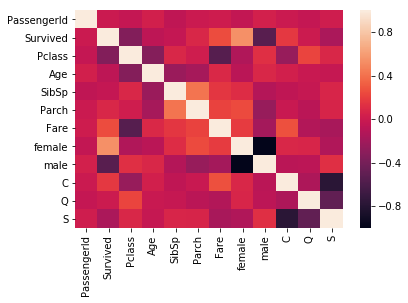

In [417]:
#now lets turn our categorical variables into integers

sex_dummies = pd.get_dummies(train.Sex).astype(int)
embarked_dummies = pd.get_dummies(train.Embarked).astype(int)

train_1 = pd.concat(
    [train, sex_dummies, embarked_dummies],
    axis=1)

train_1.drop("Sex", inplace=True, axis=1)
train_1.drop("Ticket", inplace=True, axis=1)
train_1.drop("Cabin", inplace=True, axis=1)
train_1.drop("Embarked", inplace=True, axis=1)
train_1.drop("Name", inplace=True, axis=1)

sns.heatmap(train_1.corr())
print(train_1.head(), train_1.corr())

sns.pairplot(
    X,
    x_vars=['male', 'female', 'Pclass', 'Age'],
    y_vars='Survived',
    size=6,
    aspect=1)

plt.suptitle("Marginal Plot of Survival on input features")

In [418]:
#Looks good to start as a baseline
train_1.drop("Survived", inplace=True, axis=1)
train_1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [428]:
#not efficient but got the job done
outcome_1 = pd.DataFrame(train)
outcome_1.drop("Sex", inplace=True, axis=1)
outcome_1.drop("Ticket", inplace=True, axis=1)
outcome_1.drop("Cabin", inplace=True, axis=1)
outcome_1.drop("Embarked", inplace=True, axis=1)
outcome_1.drop("SibSp", inplace=True, axis=1)
outcome_1.drop("Age", inplace=True, axis=1)
outcome_1.drop("Name", inplace=True, axis=1)
outcome_1.drop("Pclass", inplace=True, axis=1)
outcome_1.drop("Fare", inplace=True, axis=1)
outcome_1.drop("Parch", inplace=True, axis=1)
outcome_1.drop("PassengerId", inplace=True, axis=1)
outcome_1.head()

,Survived
0,0
1,1
2,1
3,1
4,0


Alrighty, we have our X and y, lets go ahead and fit that into our random forest regressor

In [429]:
model = RandomForestRegressor(n_estimators=100, 
                              oob_score=True, random_state=42)
model.fit(train_1, outcome_1)

/Users/christianjacobrenfro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [430]:
model.oob_score_

0.39931528460496379

In [431]:
best_single_tree = DecisionTreeRegressor(max_depth=3, random_state=1)
best_single_tree.fit(train_1, outcome_1)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [432]:
feature_names_cem = train_1.columns.tolist()
imp = pd.DataFrame({'feature':feature_names_cem, 'importance':best_single_tree.feature_importances_})
imp.sort_values(by='importance', ascending=False)

,feature,importance
7,male,0.628880
1,Pclass,0.213525
2,Age,0.061867
5,Fare,0.050802
3,SibSp,0.044927
0,PassengerId,0.000000
4,Parch,0.000000
6,female,0.000000
8,C,0.000000
9,Q,0.000000


Let's get to know our test data:

In [6]:
testdata.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
print(testdata.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [9]:
testdata.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
testdata.Cabin.nunique()

76

In [72]:
numsex = testdata.Sex.value_counts()
numclass = testdata.Pclass.value_counts()
numpeople = testdata.PassengerId.nunique()
numcabins = testdata.Cabin.nunique()
print("There are ", numpeople, "people on board and ", 
      numcabins, " recorded cabins in our data. See breakdown of Male/Female below:\n",
      numsex, "\n\nBreakdown of Class below:\n", numclass)

There are  418 people on board and  76  recorded cabins in our data. See breakdown of Male/Female below:
 male      266
female    152
Name: Sex, dtype: int64 

Breakdown of Class below:
 3    218
1    107
2     93
Name: Pclass, dtype: int64


In [73]:
testdata.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

OK, so we kind of now understand our test data.  this was more EDA, and I'm not sure it was necessary, but it does feel good to know what type of data im working with. 


Moving onto Train data

In [74]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
print(traindata.SibSp.value_counts(), '\n\n', traindata.Sex.value_counts(), '\n\n', traindata.Embarked.value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 

 male      577
female    314
Name: Sex, dtype: int64 

 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
traindata.SibSp.unique().counts

In [ ]:
traindata.SibSp.unique()value_counts

In [ ]:
traindata.SibSp.unique()value_count

In [13]:
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
traindata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'''
This is going to be a set of data that dropped all rows which have an NA in it
'''

In [61]:
traindata.dropna?

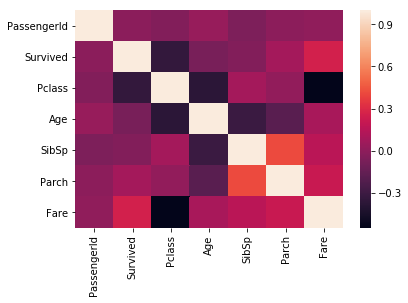

In [37]:
sns.heatmap(traindata.corr())

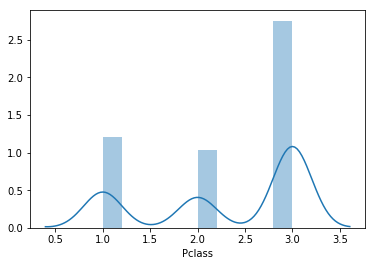

In [41]:
sns.distplot(traindata['Pclass'])

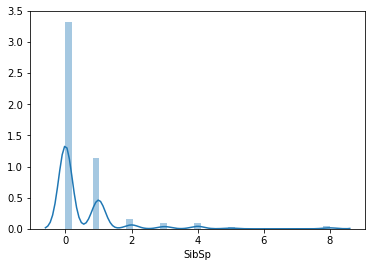

In [42]:
sns.distplot(traindata['SibSp'])

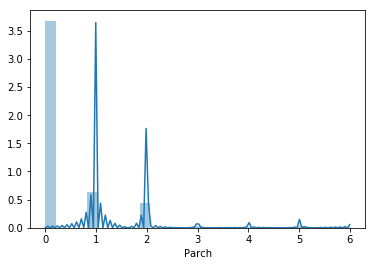

In [43]:
sns.distplot(traindata['Parch'])

In [57]:
surv_train = traindata.groupby(['Pclass','Survived'])

In [59]:
surv_train.count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

In [50]:
surv_train.head()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [ ]:
X = standardScaler().fit_transform(traindata[])
y = traindata[Survived]

lr = LinearRegression()

mean_squared_errors = np.abs(cross_val_score(lr,))

'''
#must take absolute value because sklearn makes the errors negative - dont ask me why
mean_squared_errors = np.abs(cross_val_score(lr,X,y,cv=50,scoring='neg_mean_squared_error'))
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("50-fold mean RMSE: ", np.mean(root_mean_squared_errors))
'''

In [ ]:
'''coeffs = LinearRegression().fit(X,y).coef_
coeff_df = pd.DataFrame(list(zip(housing_features,np.abs(coeffs))),columns=["features","betas"])
coeff_df.sort_values("betas",ascending=False,inplace=True)
coeff_df
'''